In [2]:
SCOPETYPE = 'OPENADC'
PLATFORM = 'CWLITEARM'
CRYPTO_TARGET='TINYAES128C'
SS_VER='SS_VER_1_1'

In [3]:
%run "Setup_Scripts/Setup_Generic.ipynb"

(ChipWhisperer NAEUSB WARNING|File naeusb.py:713) Your firmware (0.62) is outdated - latest is 0.64 See https://chipwhisperer.readthedocs.io/en/latest/firmware.html for more information


INFO: Found ChipWhisperer😍


In [4]:
NO_OF_PLAINTEXTS = 50
scope.adc.samples = 4200

In [5]:
import random
import string

plaintexts = []
plaintexts = [[random.randint(0, 255) for _ in range(8)] for _ in range(NO_OF_PLAINTEXTS)]

## Original

In [18]:
%%bash -s "$PLATFORM" "$CRYPTO_TARGET" "$SS_VER"
cd ../hardware/victims/firmware/simpleserial-blowfish
make PLATFORM=$1 CRYPTO_TARGET=NONE SS_VER=$3 -j
#make clean

SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
make[1]: '.dep' is up to date.
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
arm-none-eabi-gcc (GNU Arm Embedded Toolchain 10-2020-q4-major) 10.2.1 20201103 (release)
Copyright (C) 2020 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

.
Welcome to another exciting ChipWhisperer target build!!
.
Assembling: .././hal/stm32f3/stm32f3_startup.S
arm-none-eabi-gcc -c -mcpu=cortex-m4 -I. -x assembler-with-cpp -mthumb -mfloat-abi=soft -fmessage-length=0 -ffunction-sections -DF_CPU=7372800 -Wa,-gstabs,-adhlns=objdir-CWLITEARM/stm32f3_startup.lst -I.././simpleserial/ -I.././simpleserial/ -I.././hal -I.././hal/stm32f3 -I.././hal/stm32f3/CMSIS -I.././hal/stm32f3/CMSIS/core -I.././hal/stm32f3/CMSIS/device -I.././hal/stm32f4/Legacy -I.././crypto/ .././hal/stm32f3/st

In [19]:
cw.program_target(scope, prog, "../hardware/victims/firmware/simpleserial-blowfish/simpleserial-blowfish-{}.hex".format(PLATFORM))

Detected known STMF32: STM32F302xB(C)/303xB(C)
Extended erase (0x44), this can take ten seconds or more
Attempting to program 11799 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 11799 bytes


In [20]:
from tqdm.notebook import trange
import numpy as np
import time

ktp = cw.ktp.Basic()
trace_array_original = []
textin_array = []

for i in trange(NO_OF_PLAINTEXTS, desc='Capturing traces'):
    scope.arm()
    
    target.simpleserial_write('p', bytearray(plaintexts[i]))
    
    ret = scope.capture()
    if ret:
        print("Target timed out!")
        continue
    
    response = target.simpleserial_read('r', 8)
    
    trace_array_original.append(scope.get_last_trace())

trace_array_original = np.array(trace_array_original)

Capturing traces:   0%|          | 0/50 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


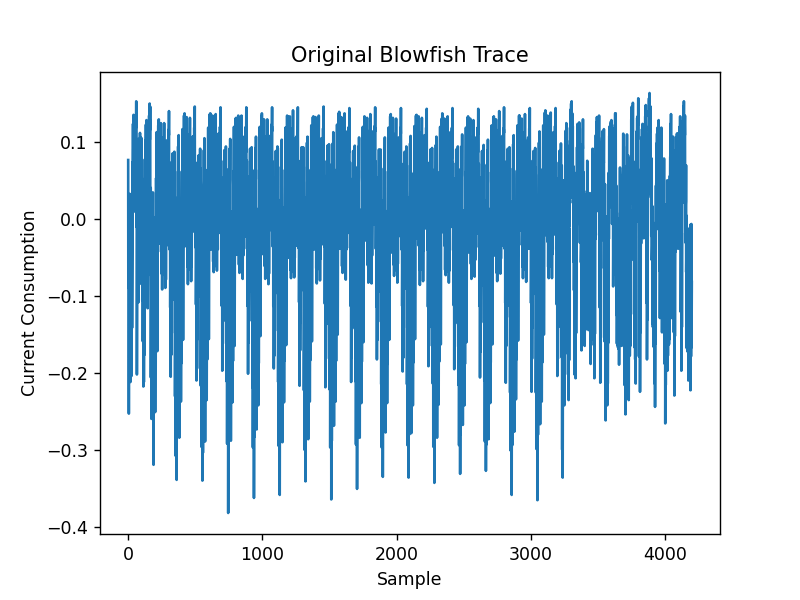

In [22]:
%matplotlib notebook
import matplotlib.pylab as plt

plt.plot(trace_array_original[0]) # Original blowfish
plt.ylabel("Current Consumption")
plt.xlabel("Sample")
plt.title("Original Blowfish Trace")

plt.show()

## Dummy func
Dummy Code in blowfish.c

In [23]:
scope.adc.samples = 4200

In [12]:
%%bash -s "$PLATFORM" "$CRYPTO_TARGET" "$SS_VER"
cd ../hardware/victims/firmware/simpleserial-blowfish
make PLATFORM=$1 CRYPTO_TARGET=NONE SS_VER=$3 -j
#make clean

SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
make[1]: '.dep' is up to date.
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
arm-none-eabi-gcc (GNU Arm Embedded Toolchain 10-2020-q4-major) 10.2.1 20201103 (release)
Copyright (C) 2020 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

.
Welcome to another exciting ChipWhisperer target build!!
.
Assembling: .././hal/stm32f3/stm32f3_startup.S
arm-none-eabi-gcc -c -mcpu=cortex-m4 -I. -x assembler-with-cpp -mthumb -mfloat-abi=soft -fmessage-length=0 -ffunction-sections -DF_CPU=7372800 -Wa,-gstabs,-adhlns=objdir-CWLITEARM/stm32f3_startup.lst -I.././simpleserial/ -I.././simpleserial/ -I.././hal -I.././hal/stm32f3 -I.././hal/stm32f3/CMSIS -I.././hal/stm32f3/CMSIS/core -I.././hal/stm32f3/CMSIS/device -I.././hal/stm32f4/Legacy -I.././crypto/ .././hal/stm32f3/st

In [13]:
cw.program_target(scope, prog, "../hardware/victims/firmware/simpleserial-blowfish/simpleserial-blowfish-{}.hex".format(PLATFORM))

Detected known STMF32: STM32F302xB(C)/303xB(C)
Extended erase (0x44), this can take ten seconds or more
Attempting to program 16751 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 16751 bytes


In [14]:
from tqdm.notebook import trange
import numpy as np
import time

ktp = cw.ktp.Basic()
trace_array_dummy = []

# target.set_key(key)
for i in trange(NO_OF_PLAINTEXTS, desc='Capturing traces'):
    scope.arm()
    
    target.simpleserial_write('p', bytearray(plaintexts[i]))
    
    ret = scope.capture()
    if ret:
        print("Target timed out!")
        continue
    
    response = target.simpleserial_read('r', 8)
    
    trace_array_dummy.append(scope.get_last_trace())

trace_array_dummy = np.array(trace_array_dummy)

Capturing traces:   0%|          | 0/50 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


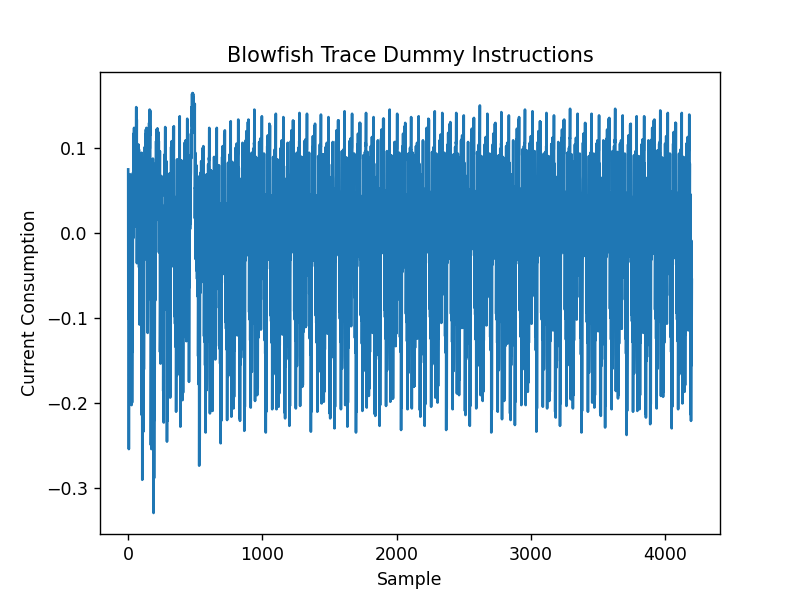

In [17]:
%matplotlib notebook
import matplotlib.pylab as plt

plt.plot(trace_array_dummy[0]) # Dummy Fuc x2
plt.ylabel("Current Consumption")
plt.xlabel("Sample")
plt.title("Blowfish Trace Dummy Instructions")

plt.show()

In [28]:
from scipy import stats

## t-Test

In [29]:
result = []

for i in range(scope.adc.samples):
    t1 = trace_array_original[:, i]
    t2 = trace_array_dummy[:, i]

    t_test = stats.ttest_ind(t1, t2, equal_var = False)
    result.append(t_test[0])

<IPython.core.display.Javascript object>


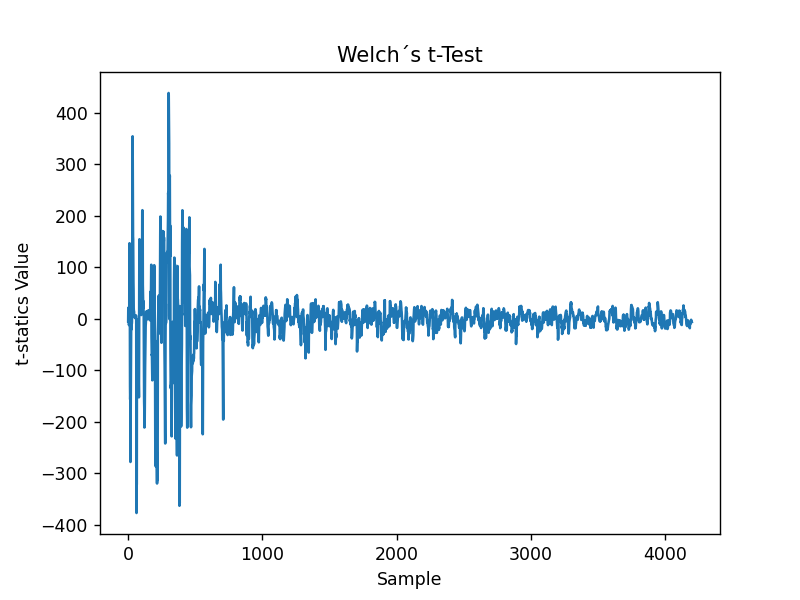

In [31]:
%matplotlib notebook
import matplotlib.pylab as plt
plt.ylabel("t-statics Value")
plt.xlabel("Sample")
plt.title("Welch´s t-Test")

plt.plot(result) 
plt.show()

In [29]:
scope.dis()
target.dis()